In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import Common_Functions as cmn

In [3]:
training_data = cmn.get_stringless_training_data()
testing_data = cmn.get_stringless_testing_data()
display(training_data.head(), testing_data.head())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [4]:
X_train = training_data.iloc[:,:-1]
y_train = training_data.iloc[:,-1:]
display(X_train.shape, X_train.head(), y_train.shape, y_train.head())

(1460, 37)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


(1460, 1)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [5]:
X_test = testing_data
y_test = []
display(X_test.shape, X_test.head(), y_test)

(1459, 37)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


[]

# GBR

In [6]:
gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, random_state=1)
gbr.fit(X_train, np.ravel(y_train))

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, min_samples_leaf=5,
                          n_estimators=1000, random_state=1)

In [7]:
print("model score on training data:", gbr.score(X_train, y_train))
y_predicted = gbr.predict(X_test) # This becomes our predicted prices for the missing dataset using forest prediction
y_predicted

model score on training data: 0.9704311686706326


array([119200.76217945, 166685.91969406, 188618.65154216, ...,
       211259.45301255, 119316.42155899, 240374.01831364])

# Hist would work with NaN
 - ended up not using this as our dataset was not big enough to satisfy minimum requirements of Hist

In [8]:
#gbr = HistGradientBoostingRegressor()
#gbr.fit(X_train, np.ravel(y_train))

In [9]:
print("model score on training data:", gbr.score(X_train, y_train))
y_predicted = gbr.predict(X_test) # This becomes our predicted prices for the missing dataset using forest prediction
y_predicted

model score on training data: 0.9704311686706326


array([119200.76217945, 166685.91969406, 188618.65154216, ...,
       211259.45301255, 119316.42155899, 240374.01831364])

In [10]:
sns.set_context("paper")
sns.set_style("ticks")

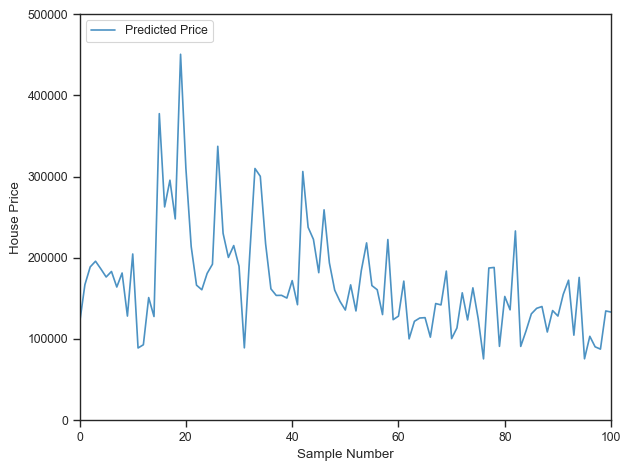

In [11]:
cmn.plot_observed_vs_predicted(predicted=y_predicted)

# Cross Validation for better parameter estimates

In [12]:
gbr = GradientBoostingRegressor(random_state=42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gbr.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [13]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt', "log2"]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 5, 10]
alpha = [i/100 for i in range(0,100,10)]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'alpha': alpha,
                 'learning_rate': learning_rate,
                 'max_depth': max_depth,
                 'max_features': max_features,
                 'min_samples_split': min_samples_split,
                 'min_samples_leaf': min_samples_leaf,
                 'n_estimators': n_estimators}
pprint(random_grid)

{'alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1, 5, 10],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [14]:
gbr = GradientBoostingRegressor()
gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

gbr_random.fit(X_train, np.ravel(y_train))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\alexa\mambaforge\envs\HousingProject\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexa\mambaforge\envs\HousingProject\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexa\mambaforge\envs\HousingProject\lib\site-packages\sklearn\ensemble\_gb.py", line 577, in fit
    self._check_params()
  File "C:\Users\alexa\mambaforge\envs\HousingProject\lib\site-packages\sklearn\ensemble\_gb.py", line 356, in _check_params
  

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                  0.6, 0.7, 0.8, 0.9],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.5, 1, 5, 10],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [15]:
gbr_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'learning_rate': 0.1,
 'alpha': 0.4}

In [16]:
gbr = gbr_random.best_estimator_
gbr.fit(X_train, np.ravel(y_train))

GradientBoostingRegressor(alpha=0.4, max_depth=10, max_features='sqrt',
                          min_samples_split=5, n_estimators=1800)

In [17]:
print("model score on training data:", gbr.score(X_train, y_train))
y_predicted = gbr.predict(X_test) # This becomes our predicted prices for the missing dataset using forest prediction
pd.DataFrame(y_predicted).to_csv(f"{cmn.export_data_path}GBR_prediction.csv")
y_predicted

model score on training data: 1.0


array([127032.32215646, 154184.38846308, 206040.81406213, ...,
       180670.7982411 , 102229.62233058, 238714.68454559])

# Feature Importance GBR

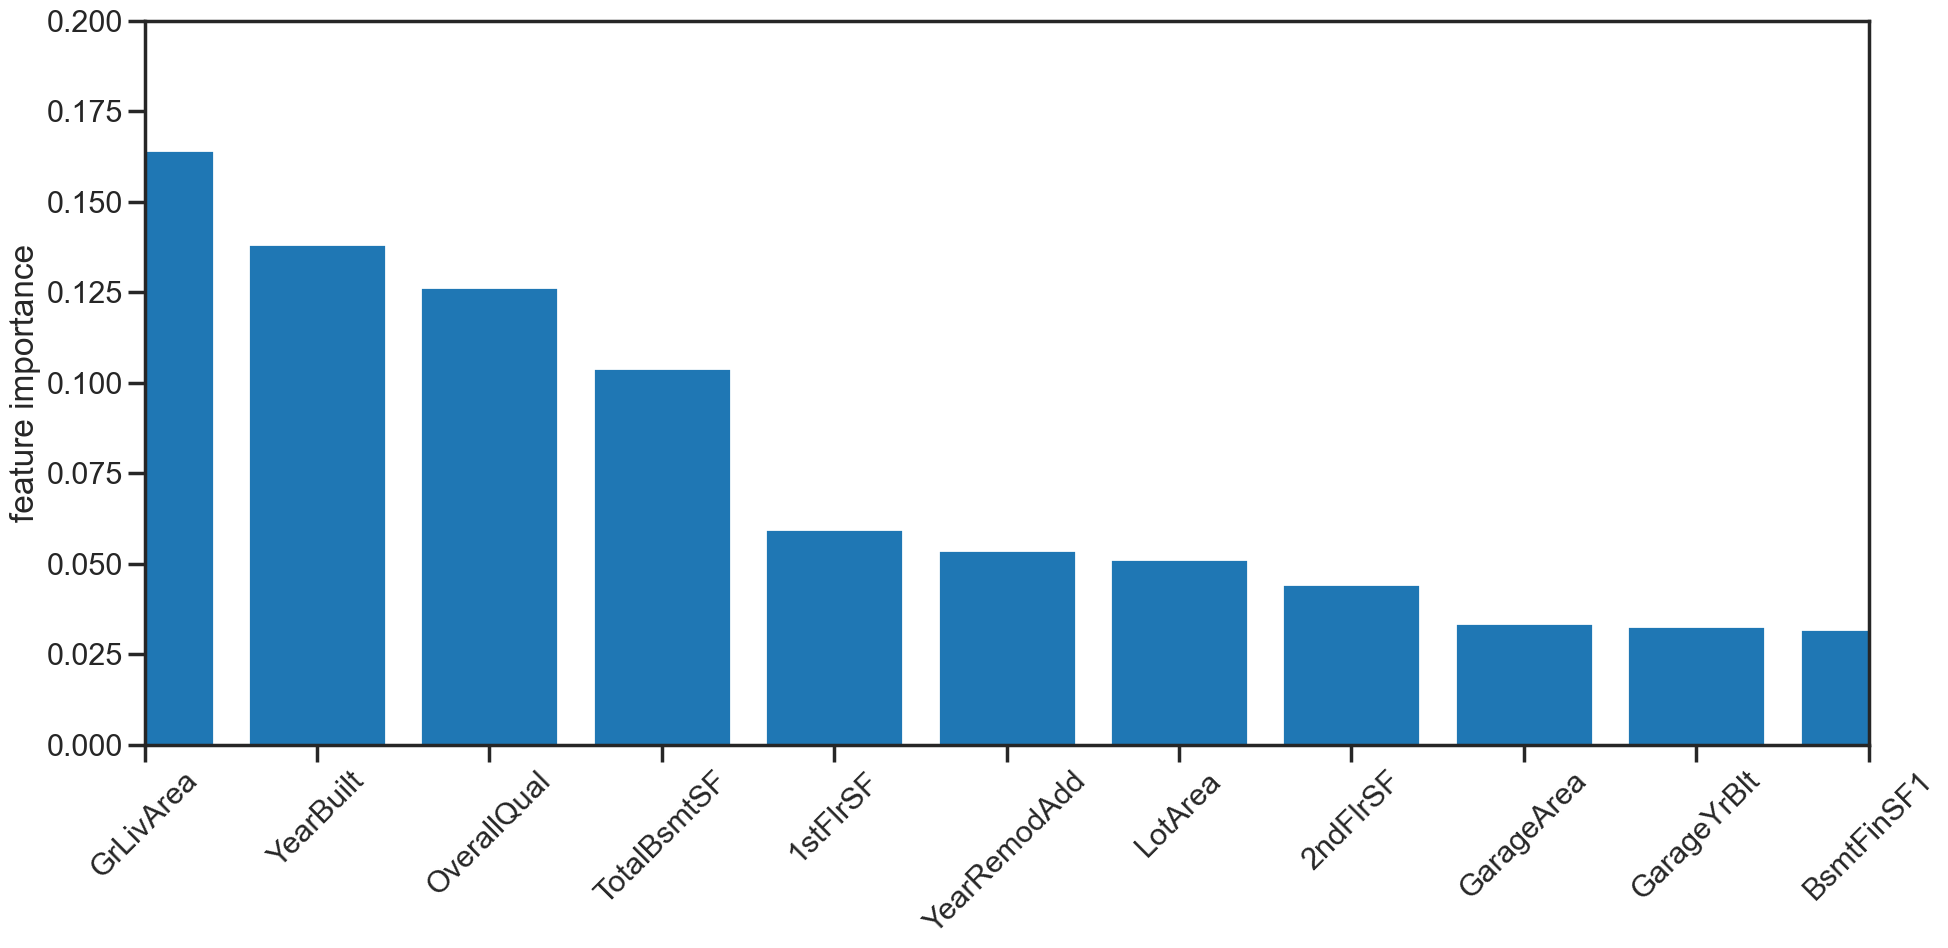

In [18]:
sns.set_context("poster")
sns.set_style("ticks")
cmn.plot_feature_importance(x_val=X_train, regressor=gbr, x_lim=10, y_lim=0.2, fig_size=(20,10))
plt.show()

In [19]:
pd.DataFrame(y_predicted).to_csv(f"{cmn.export_data_path}GBR_for_weights.csv")

# Reverse 50:50 with best params

In [20]:
gbr = gbr_random.best_estimator_
gbr.fit(X_test, y_predicted)

GradientBoostingRegressor(alpha=0.4, max_depth=10, max_features='sqrt',
                          min_samples_split=5, n_estimators=1800)

In [21]:
print("model score on training data:", gbr.score(X_test, y_predicted))
print("model score on test data:", gbr.score(X_train, y_train))

model score on training data: 1.0
model score on test data: 0.8657796423601679


In [22]:
y_train_predicted = gbr.predict(X_train)
y_train_predicted

array([199190.28606088, 182984.5570936 , 213946.69475138, ...,
       186097.35759658, 125193.49246896, 150605.19451381])

In [23]:
pd.DataFrame(y_train_predicted).to_csv(f"{cmn.export_data_path}GBR.csv")

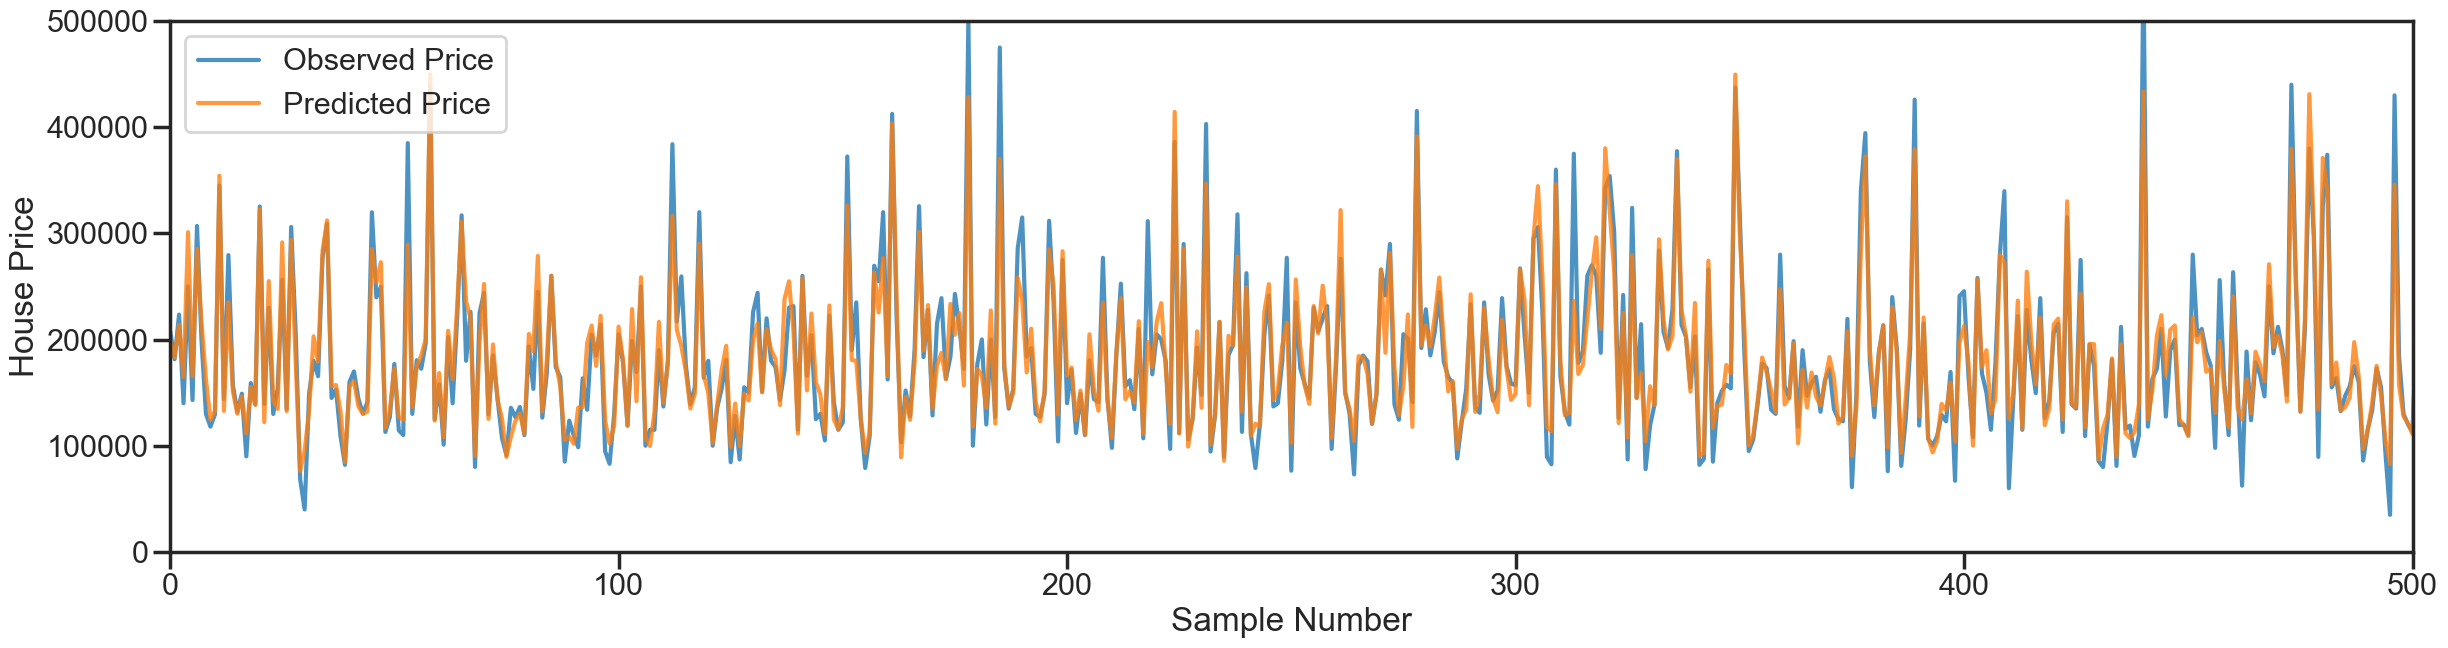

In [24]:
sns.set_context("poster")
sns.set_style("ticks")
cmn.plot_observed_vs_predicted(observed=y_train, predicted=y_train_predicted, x_lim=500, size_of_fig=(25, 7))